In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('final_df.csv',encoding='cp949')
data.head()

,id,q1_1,q1_2,q1_3,q1_4,q1_5,q3,q4,d1,d4,...,q33,q34_1,q34_2,q34_3,q52,q53,q54,q55,d12_1,d16
0,3,8,8,9,8,8,9,9,1,1,...,3,3,3,4,3,3,8,8,0,1
1,4,8,9,7,8,7,8,6,1,1,...,3,3,3,4,2,2,3,3,0,1
2,18,8,8,7,7,7,7,6,1,1,...,3,4,4,3,2,2,6,6,300,1
3,36,8,9,8,8,7,7,8,2,1,...,3,3,3,3,3,3,7,8,0,1
4,43,7,8,8,9,8,8,9,2,1,...,3,3,3,4,3,3,7,8,0,1


In [ ]:
data.columns

Index(['id', 'q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q3', 'q4', 'd1', 'd4',
       'q5_3', 'q28_1', 'q28_2', 'q28_3', 'q28_4', 'q47_2', 'q47_3', 'q47_4',
       'q47_9', 'q47_12', 'q48_1', 'q48_2', 'q48_3', 'q48_6', 'q48_7', 'q17_1',
       'q17_2', 'q17_3', 'q17_4', 'q17_5', 'q17_6', 'q17_7', 'q17_8', 'q17_9',
       'q21_1', 'q33', 'q34_1', 'q34_2', 'q34_3', 'q52', 'q53', 'q54', 'q55',
       'd12_1', 'd16'],
      dtype='object')

In [ ]:
data['d12_1'].unique()

array([  0, 300, 200, 600, 100, 400, 800, 500, 700])

In [ ]:
y=pd.read_csv('social_iso.csv',encoding='cp949')

In [ ]:
y.head()

,Unnamed: 0,id,social_iso
0,0,3,16
1,1,4,11
2,2,18,17
3,3,36,12
4,4,43,14


In [ ]:
list(y[['id']])==list(data[['id']])

True

In [ ]:
#plt.hist(y['social_iso'])

In [ ]:
mn=y['social_iso'].min()
mx=y['social_iso'].max()
data['new_y']=y['social_iso'].apply(lambda x:(x-mn)/(mx-mn))

In [ ]:
data['new_y']

0       0.4375
1       0.1250
2       0.5000
3       0.1875
4       0.3125
         ...  
1272    0.4375
1273    0.6250
1274    0.5625
1275    0.5625
1276    0.5000
Name: new_y, Length: 1277, dtype: float64

In [ ]:
#plt.hist(data['new_y'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=data.copy()
X=df.drop(['id', 'new_y'],axis=1) # iso_bin
#X=df.drop(['id','social_iso'])
y=df['new_y']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from keras.utils import np_utils
from keras import layers, models, datasets
from keras.callbacks import EarlyStopping
from tensorflow import keras
import tensorflow as tf

In [ ]:
dataset=data.drop(['id'],axis=1) # iso_bin
dataset

,q1_1,q1_2,q1_3,q1_4,q1_5,q3,q4,d1,d4,q5_3,...,q34_1,q34_2,q34_3,q52,q53,q54,q55,d12_1,d16,new_y
0,8,8,9,8,8,9,9,1,1,3,...,3,3,4,3,3,8,8,0,1,0.4375
1,8,9,7,8,7,8,6,1,1,2,...,3,3,4,2,2,3,3,0,1,0.1250
2,8,8,7,7,7,7,6,1,1,3,...,4,4,3,2,2,6,6,300,1,0.5000
3,8,9,8,8,7,7,8,2,1,4,...,3,3,3,3,3,7,8,0,1,0.1875
4,7,8,8,9,8,8,9,2,1,2,...,3,3,4,3,3,7,8,0,1,0.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,8,1,1,6,7,7,8,2,1,4,...,3,3,2,2,2,6,6,300,5,0.4375
1273,7,2,1,6,5,5,7,2,2,3,...,4,3,3,2,2,3,5,300,2,0.6250
1274,6,2,1,6,4,3,6,1,2,4,...,4,2,3,3,3,4,6,400,2,0.5625
1275,6,3,3,6,7,5,7,1,1,3,...,4,2,3,2,2,3,6,0,3,0.5625


In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=42)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("new_y")
train_stats = train_stats.transpose()
#train_stats

In [ ]:
train_labels = train_dataset.pop('new_y')
test_labels = test_dataset.pop('new_y')

In [ ]:
train_labels

411    0.4375
722    0.5000
915    0.4375
51     0.5000
44     0.5625
        ...  
517    0.5000
372    0.3125
45     0.3750
476    0.5000
157    0.6250
Name: new_y, Length: 1022, dtype: float64

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2880      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

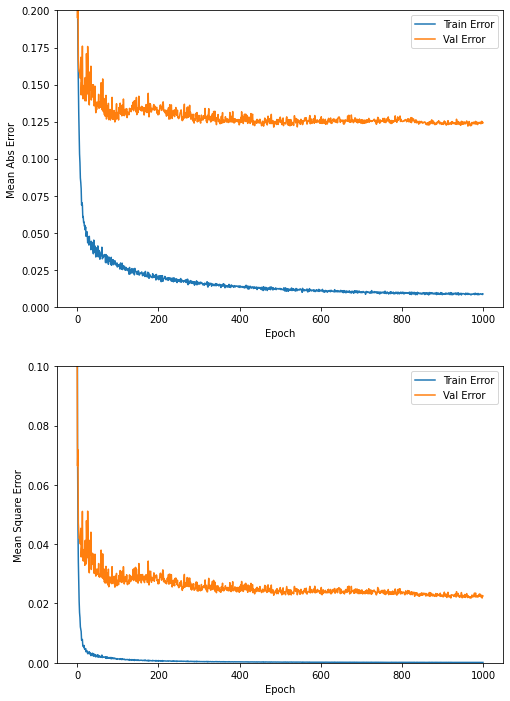

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.2])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.1])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
hist[hist['val_mse']==hist['val_mse'].min()]

,loss,mae,mse,val_loss,val_mae,val_mse
997,0.00012,0.008602,0.00012,0.021832,0.123886,0.021832


In [ ]:
round(np.sqrt(0.021832),4) # rmse

0.1478